In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob

%matplotlib inline

plt.style.use('bmh')

In [2]:
DATA = Path('Datasample/10')

In [3]:
#Datasample from oct 2018, Days 20th - 29th

In [4]:
csvs = glob(str(DATA)+'/2*/*/*.csv')

In [5]:
def extract_host(host_name):
    dfs = []
    for csv in csvs:
        current_df = pd.read_csv(csv, sep=';')
        current_df = current_df.loc[current_df.Host == host_name]
        dfs.append(current_df)
    df1 = pd.concat(dfs)
    df = df1.drop(columns=['Time.1'])
    
    return df

In [6]:
def extract_subs(csv, subs_name):
    dfs = []
    current_df = csv
    current_df = current_df.loc[current_df.Subst == subs_name]
    dfs.append(current_df)
    df = pd.concat(dfs)
    
    return df

In [7]:
def extract_unit(csv, unit):
    dfs = []
    current_df = csv
    current_df = current_df.loc[current_df.Unit == unit]
    dfs.append(current_df)
    df = pd.concat(dfs)
    
    return df

In [8]:
df_AS01 = extract_host('AS01')

In [9]:
df_AS01.head()

,Tag,Time,Value,Host,Subst,Description,Unit
65,1201_8001_00.PD,2018-10-24 07:57:00,20.821,AS01,U2A1,Padrag regulator Laegdene,%
66,1201_8001_01,2018-10-24 07:57:00,29.521,AS01,U2A1,Motorstrom pumpe 1 Laegdene,A
67,1201_8001_01.PD,2018-10-24 07:57:00,83.284,AS01,U2A1,Padrag pumpe 1 Laegdene,%
68,1201_8001_02,2018-10-24 07:57:00,1.369,AS01,U2A1,Motorstrom pumpe 2 Laegdene,A
69,1201_8001_02.PD,2018-10-24 07:57:00,0.000,AS01,U2A1,Padrag pumpe 2 Laegdene,%


In [10]:
df_AS01.Unit.unique()

array(['%', 'A', 'kote', 'm', 'Bar', 'm3/t', 'Gr.C', 'mVs', 'Kote', 'kW',
       'kVAr', 'kWh', 'kVA', 'CosF', 'V', 'Amp', 'Hz', 'mm/s', 'VDC',
       'grdC', 'bar', 'rpm', 'sek', 'moh', 'dgc', 'HZ', 'kvar', 'kva',
       'pH', 'grC', 'NTU', 'mg/l', 'Hazen', 'Ph', 'csx', 'gr.C', 'l/sek.',
       'mvs', 'kg', 'Kg', 'kg/t', 'Vol%', 'l/t', 'liter', 'm3', 'mbar',
       'W/m2', 'w/m2', 'noe', 'rndm', 'Ws/m2', 'm/s', 'deg.M', 'mm',
       'mm/t', 'cm', ' ', nan, 'l/s', 'Nm', 'PH', 'Nr', '% H20', 'kw',
       'VOL%', 'g/m3', 'l', 'nn', '%RH', 'HHMM', 'min', 'ant', 'grd'],
      dtype=object)

In [11]:
df_AS01.Subst.unique()

array(['U2A1', 'RAPP', 'U4A1', 'U7A1', 'U5A1', 'U6A1', 'U3A1', 'ESPE',
       'SPA1'], dtype=object)

#### Extract flow and pressure from AS01 and plot distribution

In [12]:
df_AS01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828740 entries, 65 to 6170
Data columns (total 7 columns):
Tag            object
Time           object
Value          float64
Host           object
Subst          object
Description    object
Unit           object
dtypes: float64(1), object(6)
memory usage: 660.9+ MB


In [13]:
df_AS01_flow = extract_unit(df_AS01,'m3/t')

count    1.381794e+06
mean     3.648552e+02
std      7.690508e+02
min     -1.464150e+03
25%      0.000000e+00
50%      1.296190e+02
75%      3.607040e+02
max      6.000000e+03
Name: Value, dtype: float64


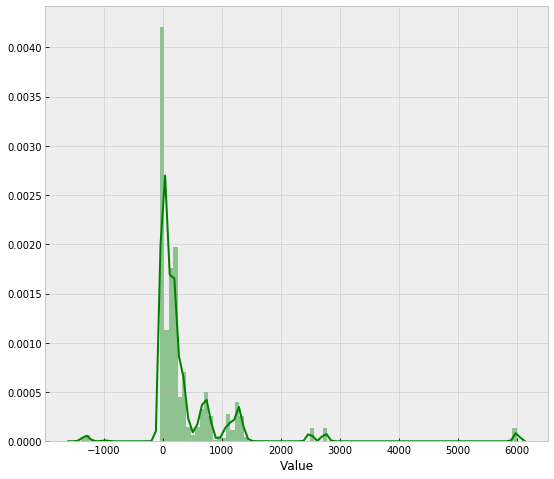

In [14]:
print(df_AS01_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_AS01_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [15]:
df_AS01_pressure = extract_unit(df_AS01, 'Bar')

count    333110.000000
mean          7.588115
std           6.097415
min           0.000000
25%           2.923000
50%           7.088000
75%          13.967000
max          17.889000
Name: Value, dtype: float64


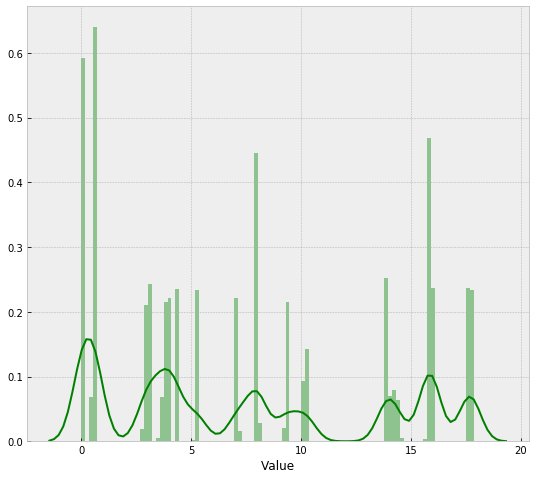

In [16]:
print(df_AS01_pressure['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_AS01_pressure['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [17]:
df_test = df_AS01_flow.set_index('Time')

In [18]:
df_AS01_flow.Time = pd.to_datetime(df_AS01_flow.Time)

In [19]:
df_AS01_flow.set_index('Time', inplace=True)

In [20]:
df_AS01_flow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381794 entries, 2018-10-24 07:57:00 to 2018-10-22 22:26:00
Data columns (total 6 columns):
Tag            1381794 non-null object
Value          1381794 non-null float64
Host           1381794 non-null object
Subst          1381794 non-null object
Description    1381794 non-null object
Unit           1381794 non-null object
dtypes: float64(1), object(5)
memory usage: 73.8+ MB


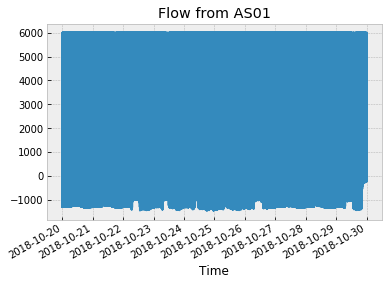

In [21]:
df_AS01_flow.Value.plot(title='Flow from AS01')
plt.show()

In [22]:
df_AS01_flow['2018-10'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381794 entries, 2018-10-24 07:57:00 to 2018-10-22 22:26:00
Data columns (total 6 columns):
Tag            1381794 non-null object
Value          1381794 non-null float64
Host           1381794 non-null object
Subst          1381794 non-null object
Description    1381794 non-null object
Unit           1381794 non-null object
dtypes: float64(1), object(5)
memory usage: 73.8+ MB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381794 entries, 2018-10-24 07:57:00 to 2018-10-22 22:26:00
Data columns (total 6 columns):
Tag            1381794 non-null object
Value          1381794 non-null float64
Host           1381794 non-null object
Subst          1381794 non-null object
Description    1381794 non-null object
Unit           1381794 non-null object
dtypes: float64(1), object(5)
memory usage: 73.8+ MB


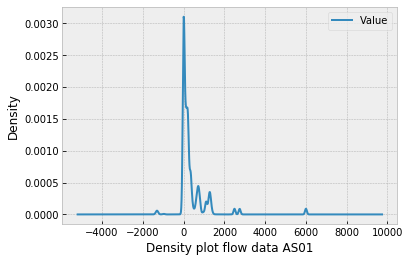

In [24]:
ax = df_test.plot(kind='density', linewidth=2)
ax.set_xlabel('Density plot flow data AS01')
plt.show()

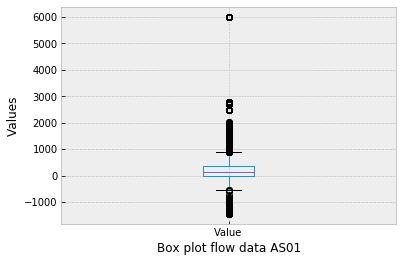

In [25]:
ax1 = df_test.boxplot()
ax1.set_xlabel('Box plot flow data AS01')
ax1.set_ylabel('Values')
plt.show()

In [26]:
# df_result = df_test.loc['2018-10-20 07:00:00':'2018-10-20 08:00:00']

In [34]:
def chopchop(csv):
    temp = []
    current_df = csv
    temp = current_df.loc['2018-10-20 01:00:00':'2018-10-20 02:00:00']
   
    return temp

In [35]:
df_AS01_test = chopchop(df_test)

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381794 entries, 2018-10-24 07:57:00 to 2018-10-22 22:26:00
Data columns (total 6 columns):
Tag            1381794 non-null object
Value          1381794 non-null float64
Host           1381794 non-null object
Subst          1381794 non-null object
Description    1381794 non-null object
Unit           1381794 non-null object
dtypes: float64(1), object(5)
memory usage: 113.8+ MB


In [37]:
df_AS01_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53304 entries, 2018-10-20 01:00:00 to 2018-10-20 02:00:00
Data columns (total 6 columns):
Tag            53304 non-null object
Value          53304 non-null float64
Host           53304 non-null object
Subst          53304 non-null object
Description    53304 non-null object
Unit           53304 non-null object
dtypes: float64(1), object(5)
memory usage: 2.8+ MB


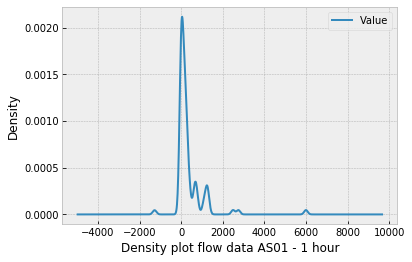

In [38]:
ax = df_AS01_test.plot(kind='density', linewidth=2)
ax.set_xlabel('Density plot flow data AS01 - 1 hour')
plt.show()

In [39]:
df_AS01_test.Value.median()

134.506

In [40]:
df_test.Value.median()

129.619

#### Extract flow and pressure from all subst connected to AS01 and plot distribution

#### U2A1

In [41]:
df_U2A1_AS01 = extract_subs(df_AS01, 'U2A1')

In [42]:
df_U2A1_flow = extract_unit(df_U2A1_AS01, 'm3/t')

In [43]:
df_U2A1_pressure = extract_unit(df_U2A1_AS01, 'Bar')

count    481142.000000
mean        327.921556
std        1006.387241
min           0.000000
25%           0.000000
50%          82.698000
75%         222.385000
max        6000.000000
Name: Value, dtype: float64


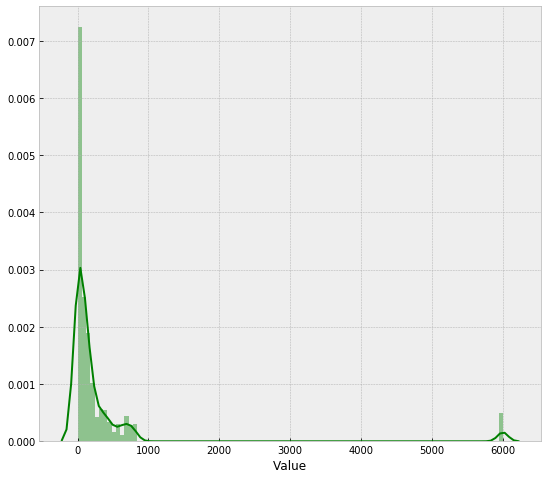

In [44]:
print(df_U2A1_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U2A1_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    84561.000000
mean         5.906135
std          3.398012
min          0.000000
25%          2.933000
50%          5.379000
75%          9.333000
max         16.000000
Name: Value, dtype: float64


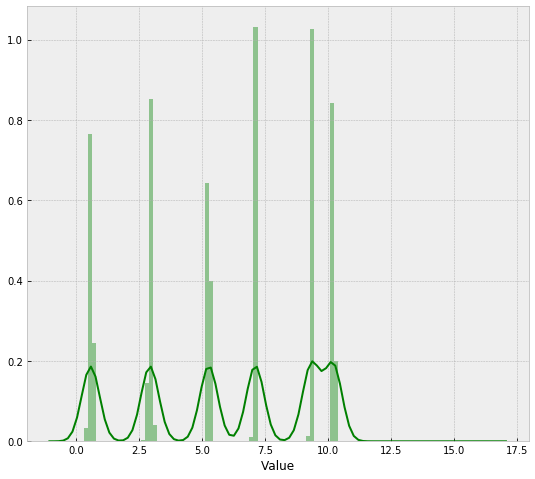

In [45]:
print(df_U2A1_pressure['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U2A1_pressure['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### RAPP

In [46]:
df_RAPP_AS01 = extract_subs(df_AS01, 'RAPP')

In [47]:
df_RAPP_flow = extract_unit(df_RAPP_AS01, 'm3/t')

In [48]:
df_RAPP_pressure = extract_unit(df_RAPP_AS01, 'Bar')

count    70180.000000
mean       -62.708596
std        668.996123
min      -1464.150000
25%          0.000000
50%          0.000000
75%        174.227750
max        800.000000
Name: Value, dtype: float64


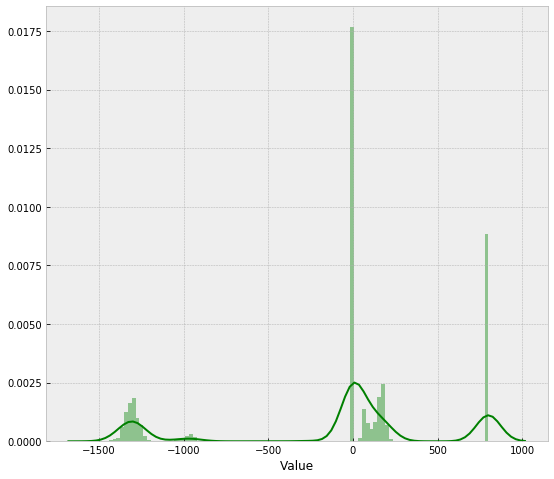

In [49]:
print(df_RAPP_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_RAPP_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### No Pressure for RAPP

#### U4A1

In [50]:
df_U4A1_AS01 = extract_subs(df_AS01, 'U4A1')

In [51]:
df_U4A1_flow = extract_unit(df_U4A1_AS01, 'm3/t')

In [52]:
df_U4A1_pressure = extract_unit(df_U4A1_AS01, 'Bar')

count    140908.000000
mean        737.928739
std         867.680742
min           0.000000
25%           0.000000
50%          60.336000
75%        1243.190000
max        2788.430000
Name: Value, dtype: float64


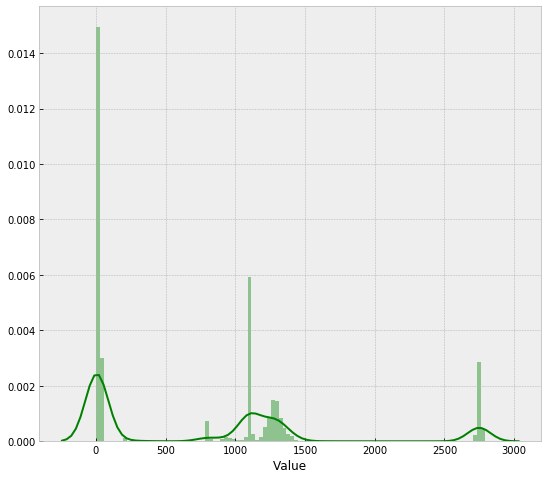

In [53]:
print(df_U4A1_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U4A1_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    65805.000000
mean         7.670185
std          5.108552
min          0.000000
25%          3.177000
50%          7.976000
75%          8.042000
max         16.000000
Name: Value, dtype: float64


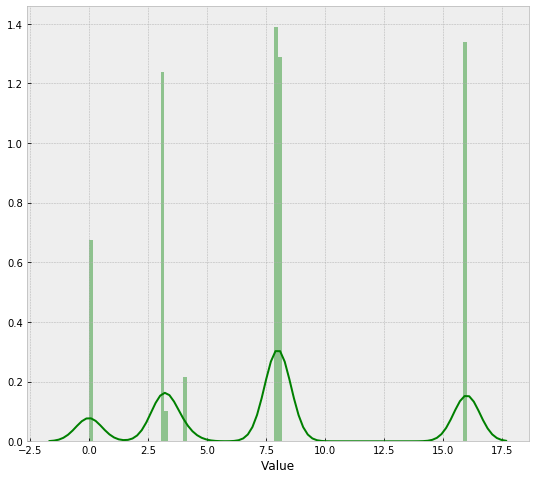

In [54]:
print(df_U4A1_pressure['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U4A1_pressure['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### U7A1

In [55]:
df_U7A1_AS01 = extract_subs(df_AS01, 'U7A1')

In [56]:
df_U7A1_flow = extract_unit(df_U7A1_AS01, 'm3/t')

In [57]:
df_U7A1_pressure = extract_unit(df_U7A1_AS01, 'Bar')

In [58]:
df_U7A1_flow.Description.unique()

array(['Reserve RM'], dtype=object)

In [59]:
df_U7A1_pressure.Description.unique()

array([], dtype=object)

#### U5A1

In [60]:
df_U5A1_AS01 = extract_subs(df_AS01, 'U5A1')

In [61]:
df_U5A1_flow = extract_unit(df_U5A1_AS01, 'm3/t')

In [62]:
df_U5A1_pressure = extract_unit(df_U5A1_AS01, 'Bar')

count    28182.000000
mean      1245.463552
std        162.383772
min        133.333000
25%       1241.030000
50%       1276.605000
75%       1311.262500
max       2013.190000
Name: Value, dtype: float64


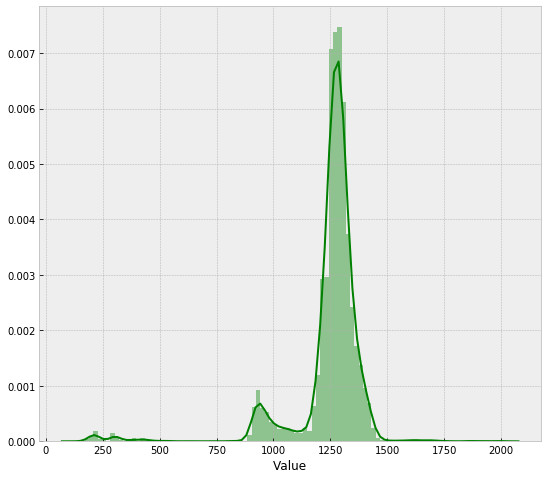

In [63]:
print(df_U5A1_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U5A1_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    56366.000000
mean         5.033251
std          6.373948
min          0.000000
25%          0.514250
50%          2.933500
75%          3.882000
max         15.984000
Name: Value, dtype: float64


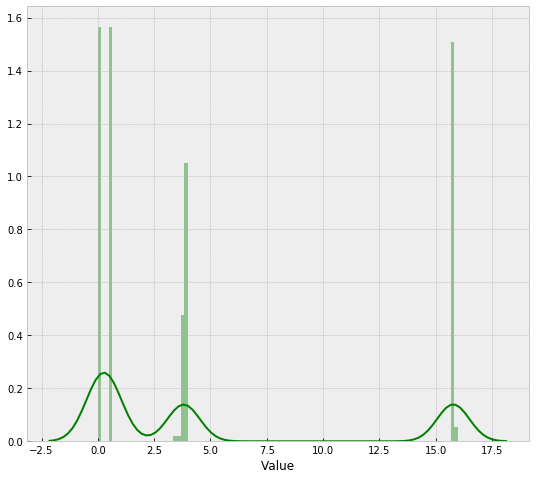

In [64]:
print(df_U5A1_pressure['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U5A1_pressure['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### U6A1

In [65]:
df_U6A1_AS01 = extract_subs(df_AS01, 'U6A1')

In [66]:
df_U6A1_flow = extract_unit(df_U6A1_AS01, 'm3/t')

In [67]:
df_U6A1_pressure = extract_unit(df_U6A1_AS01, 'Bar')

count    253620.000000
mean        349.718340
std         361.098757
min           0.000000
25%         207.133000
50%         216.068000
75%         226.412000
max        1625.790000
Name: Value, dtype: float64


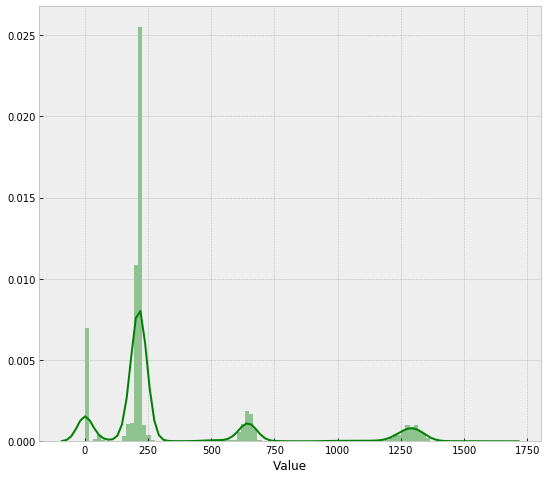

In [68]:
print(df_U6A1_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U6A1_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    14090.000000
mean        14.200943
std          0.164439
min         13.851000
25%         14.068000
50%         14.201000
75%         14.330000
max         14.534000
Name: Value, dtype: float64


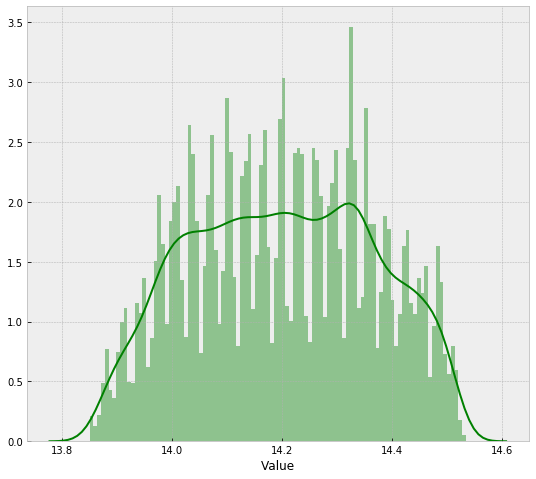

In [69]:
print(df_U6A1_pressure['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U6A1_pressure['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### U3A1

In [ ]:
df_U3A1_AS01 = extract_subs(df_AS01, 'U3A1')

In [ ]:
df_U3A1_flow = extract_unit(df_U3A1_AS01, 'm3/t')

In [ ]:
df_U3A1_pressure = extract_unit(df_U3A1_AS01, 'Bar')

In [ ]:
print(df_U3A1_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_U3A1_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
#### No Pressure U3A1

#### ESPE

In [ ]:
df_ESPE_AS01 = extract_subs(df_AS01, 'ESPE')

In [ ]:
df_ESPE_flow = extract_unit(df_ESPE_AS01, 'm3/t')

In [ ]:
df_ESPE_pressure = extract_unit(df_ESPE_AS01, 'Bar')

In [ ]:
print(df_ESPE_flow['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_ESPE_flow['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
print(df_ESPE_pressure['Value'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_ESPE_pressure['Value'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### SPA1

In [ ]:
df_SPA1_AS01 = extract_subs(df_AS01, 'SPA1')

In [ ]:
df_SPA1_flow = extract_unit(df_SPA1_AS01, 'm3/t')

In [ ]:
df_SPA1_pressure = extract_unit(df_SPA1_AS01, 'Bar')

In [ ]:
df_SPA1_flow.Description.unique()

In [ ]:
df_SPA1_pressure.Description.unique()

#### Concat flow and pressure

In [ ]:
df_AS01_con = pd.concat([df_AS01_flow, df_AS01_pressure])
df_AS01_con.head()

In [ ]:
list(set(df_AS01_con.dtypes.tolist()))

In [ ]:
df_AS01_ = df_AS01_con.select_dtypes(include=['float64'])

In [ ]:
df_AS01_.head()

In [ ]:
df_AS01_.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);